In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
from brownian_ot import brownian_ot as bt
from brownian_ot.brownian_ot import analysis

3) Simulate a sphere in an LG donut beam (e.g., LG02). Extract the radius of the orbit and the orbital period.

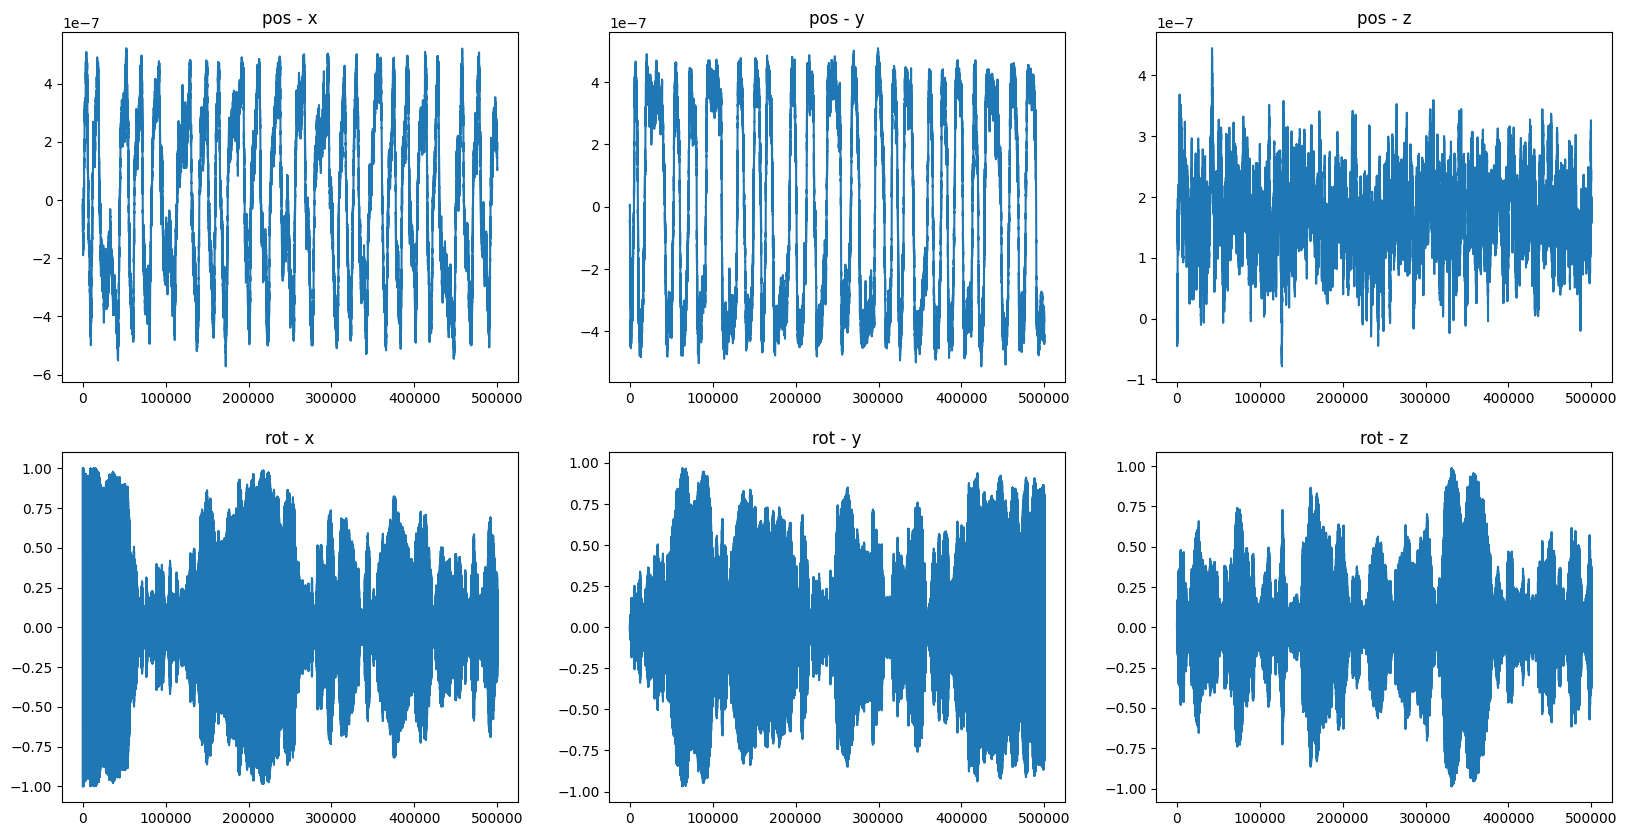

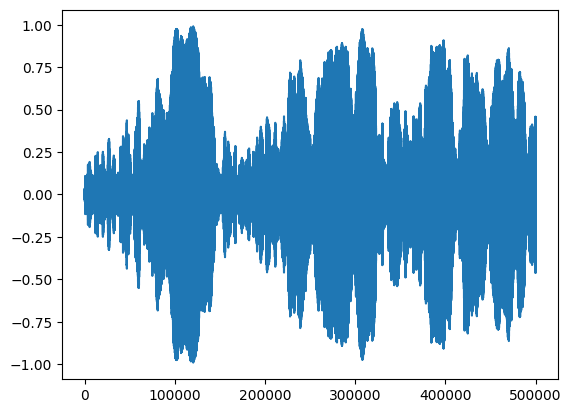

In [2]:
# ot_sim_10-29-2023_10 34 27
# 3) Simulate a sphere in an LG donut beam (e.g., LG02). Extract the radius of the orbit and the orbital period.

traj = np.load(r"../data/data3/traj.npy")
fig, ax = plt.subplots(2,3,figsize = (20,10))
# plt.grid()
ax[0,0].set_title("pos - x")
ax[0,0].plot(traj[:,0])
ax[0,1].set_title("pos - y")
ax[0,1].plot(traj[:,1])
ax[0,2].set_title("pos - z")
ax[0,2].plot(traj[:,2])
ax[1,0].set_title("rot - x")
ax[1,0].plot(traj[:,3])
ax[1,1].set_title("rot - y")
ax[1,1].plot(traj[:,4])
ax[1,2].set_title("rot - z")
ax[1,2].plot(traj[:,5])
plt.figure()
plt.plot(traj[:,6])

In [3]:
traj_expanded= analysis.expand_trajectory(traj)
del(traj)

In [4]:
traj_expanded.shape[0]

500001

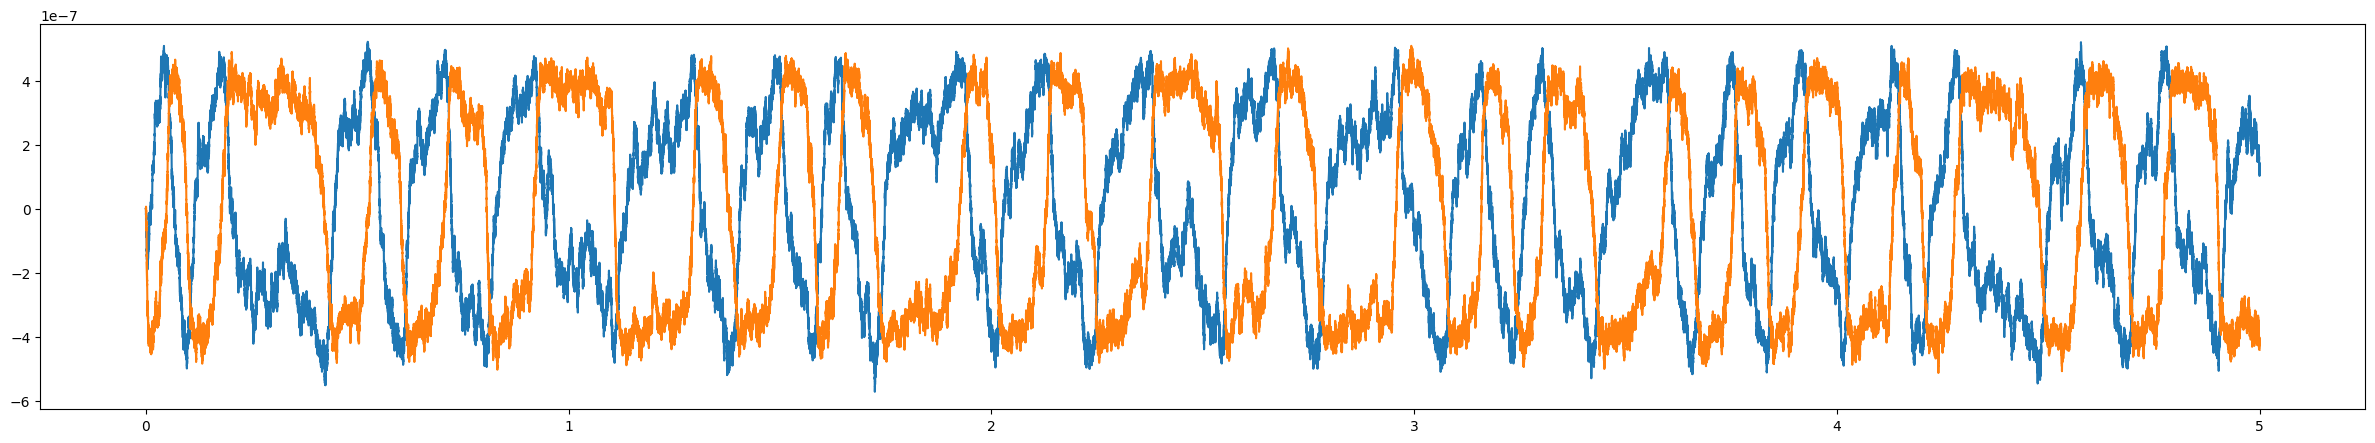

In [5]:
plt.figure(figsize=(30,5))
t = np.arange(0,traj_expanded.shape[0]*1e-5,1e-5)
plt.plot(t,traj_expanded[:,0])
plt.plot(t,traj_expanded[:,1])

In [6]:
top =0
bot =0
for i in traj_expanded[:,0]:
    if top < i:
        top =i
    if bot > i:
        bot = i
r = (np.abs(top)+np.abs(bot))/2
print("radius :",r)

radius : 5.465525152251295e-07


std_passes * dt = time period =   2


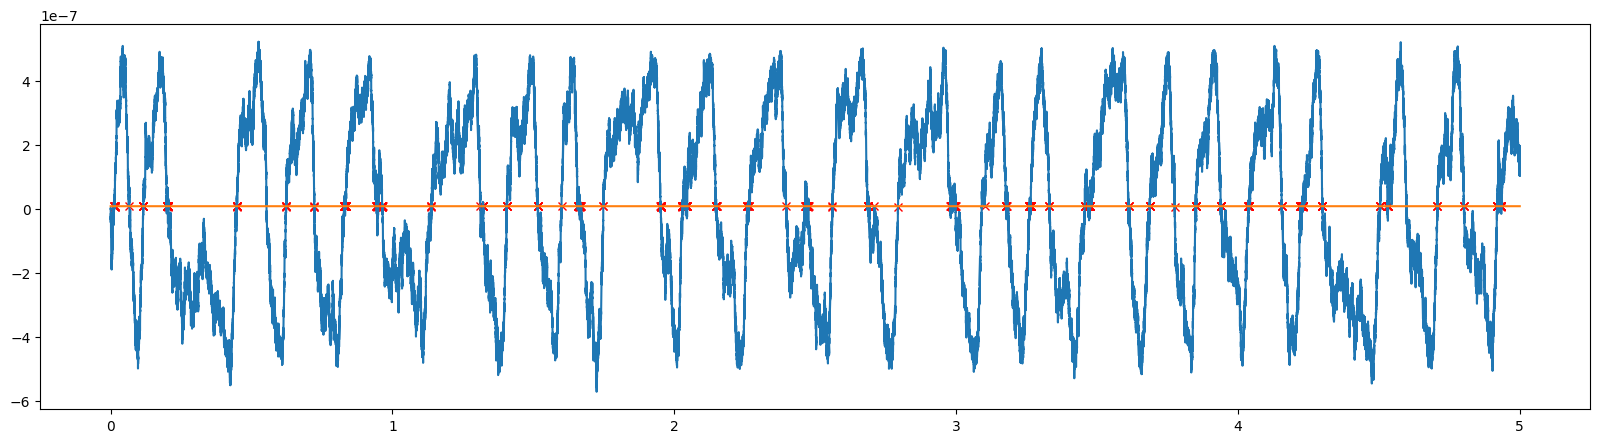

In [7]:
pass_y = []
pass_x = []
count = 0
mean = np.mean(traj_expanded[:,0])
for i in traj_expanded[:,0]:
    if i > mean-1e-9 and i < mean+1e-9:
        pass_y.append(i)
        pass_x.append(count*1e-5)
    count+=1
plt.figure(figsize=(20,5))
plt.plot(pass_x,pass_y,"x",color ="red")
plt.plot(t,traj_expanded[:,0])
plt.plot(t,np.ones(len(traj_expanded[:,0]))*np.mean(traj_expanded[:,0]))
std_passes = np.std(pass_x)
print("std_passes * dt = time period =  ",int(std_passes*2))